In [1]:
import pandas as pd
import numpy as np

train= pd.read_csv("Data/train_data.csv")
test= pd.read_csv("Data/test_data.csv")

df_train= pd.concat([train], axis=0)


In [2]:
df_train = df_train[['FFT answer','Comment sentiment']]
df_train = df_train[df_train['Comment sentiment'].isna()==False]

In [3]:
conditions = [
    df_train['Comment sentiment'] >= 4,
    #df_train['Comment sentiment'] == 3,
    df_train['Comment sentiment'] <= 2,
]

values = [1,  0]

df_train['rating'] = np.select(conditions, values)

In [4]:
df_train.head(10)

,FFT answer,Comment sentiment,rating
1,Nothing.,1.0,0
3,None.,1.0,0
4,Cue waiting time by an hour.,3.0,0
6,None. Quite satisfied.,2.0,0
7,Cut the waiting time from 2 hours before appoi...,3.0,0
8,Nothing at all.,1.0,0
9,Nothing.,1.0,0
11,Not your problem but something must be done to...,4.0,1
12,21/09/2021. I was at battle hill hospital 10am...,3.0,0
13,Nothing really. You cannot control attitude of...,3.0,0


<Axes: >

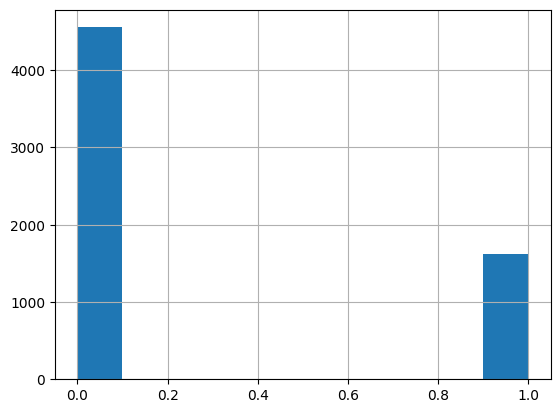

In [5]:
df_train['rating'].hist()

In [6]:
features = df_train['FFT answer'].values
labels = df_train['rating'].values

In [7]:
import re
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [8]:
processed_features

['nothing ',
 'none ',
 'cue waiting time by an hour ',
 'none quite satisfied ',
 'cut the waiting time from 2 hours before appointment to 1 hour depending which hospital ',
 'nothing at all ',
 'nothing ',
 'not your problem but something must be done to relieve the handover times at hospital ',
 '21 09 2021 was at battle hill hospital 10am everything was good going and return home realise you have to wait but was anxious previous day ',
 'nothing really you cannot control attitude of taxi drivers ',
 'nothing everything from start of journey to returning home 1st class really appreciate the service ',
 'not happy with taxi driver who booked by patient transport driver not very helpful and made me feel uncomfortable when got to hospital when we got to hospital he was going to just drop me off despite informing telephone operator would need wheelchair on arrival he was very disrespectful when requested one ',
 'booking office could be more helpful ',
 'when patient needs an escort par

In [9]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#vectorizer = TfidfVectorizer (max_features=100, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

vectorizer = CountVectorizer()
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [10]:
processed_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=500, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = text_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[867  41]
 [114 214]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       908
           1       0.84      0.65      0.73       328

    accuracy                           0.87      1236
   macro avg       0.86      0.80      0.83      1236
weighted avg       0.87      0.87      0.87      1236

0.8745954692556634


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
    max_depth=7, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8729773462783171

In [15]:
from pycaret.classification import *

In [16]:
exp_clf101 = setup(data = processed_features, target = labels, session_id=123) 

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(6179, 5052)"
4,Transformed data shape,"(6179, 5052)"
5,Transformed train set shape,"(4325, 5052)"
6,Transformed test set shape,"(1854, 5052)"
7,Numeric features,5051
8,Preprocess,True
9,Imputation type,simple


In [17]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8742,0.9153,0.6624,0.8251,0.7341,0.6532,0.6604,7.4430
lr,Logistic Regression,0.8666,0.9131,0.6473,0.8086,0.7175,0.6318,0.6395,1.9120
lightgbm,Light Gradient Boosting Machine,0.8657,0.9174,0.6729,0.7864,0.7247,0.6366,0.6404,3.2280
rf,Random Forest Classifier,0.8613,0.9096,0.5999,0.8255,0.6939,0.6073,0.6208,8.3630
svm,SVM - Linear Kernel,0.8583,0.8810,0.6720,0.7648,0.7127,0.6195,0.6236,3.7410
ridge,Ridge Classifier,0.8414,0.8582,0.5752,0.7646,0.6548,0.5548,0.5653,5.4970
ada,Ada Boost Classifier,0.8414,0.8759,0.5832,0.7602,0.6585,0.5577,0.5670,9.5060
gbc,Gradient Boosting Classifier,0.8412,0.8892,0.5085,0.8199,0.6261,0.5326,0.5579,24.4270
knn,K Neighbors Classifier,0.8106,0.7803,0.3536,0.8245,0.4934,0.3999,0.4546,2.0560
dt,Decision Tree Classifier,0.8076,0.7292,0.5884,0.6469,0.6158,0.4880,0.4893,3.4090


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)